In [ ]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import scipy.sparse
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [3]:
data = "C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\granulomas_final.h5ad"

In [4]:
adata = sc.read_h5ad(data)
adata.uns['log1p']["base"] = None # bug fix

print(adata.obs['sample'].value_counts())
print()
print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
print('X size =', adata.X.shape)

sample
granuloma2    9392
granuloma1    9302
granuloma3    8909
Name: count, dtype: int64

X matrix is sparse: False
X size = (27603, 23693)


In [5]:
adata

AnnData object with n_obs × n_vars = 27603 × 23693
    obs: 'scDblFinder_score', 'scDblFinder_class', 'doublet', 'n_genes_by_counts', 'total_counts', 'type', 'sample', 'batch_type', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'size_factors', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.4', 'leiden_1.7', 'leiden_2.0', 'leiden_2.5', 'leiden_3.0', 'leiden_3.5', 'leiden_4.0', 'leiden_4.5', 'hclust', 'kmeans', 'my_clust_1', 'immune', 'mesothelial', 'stromal', 'endothelial', 'epithelial', 'muscle', 'Immune', 'Myeloid', 'Lymphoid', 'Mesenchyme', 'Mesothelial', 'Stromal', 'SMC', 'Endothelial', 'Blood vessels', 'LEC', 'Epithelial', 'Ciliated', 'Secretory'
    var: 'gene_ids', 'fe

In [6]:
print(adata.X.min())
print(adata.X.max())

0.0
10.413485


In [7]:
print(adata.X)
print(adata.X.shape)
print(type(adata.X))
print(adata.X.dtype)

[[0.         0.         0.         ... 0.         0.         0.65802306]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.9530956 ]
 ...
 [0.         0.         0.         ... 0.         0.         0.40804082]
 [0.         0.         0.         ... 0.         0.39723676 1.0820873 ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(27603, 23693)
<class 'numpy.ndarray'>
float32


In [8]:
print(adata.obsm["Scanorama"])
print(adata.obsm["Scanorama"].shape)
print(type(adata.obsm["Scanorama"]))
print(adata.obsm["Scanorama"].dtype)

[[ 0.58992589 -0.26769783 -0.26269878 ... -0.01582297 -0.02266166
   0.00788249]
 [-0.00743494  0.29018616  0.08258069 ... -0.07953958  0.01775138
  -0.0069333 ]
 [-0.40344681 -0.24987528 -0.01690571 ... -0.00592834  0.02497448
  -0.01926762]
 ...
 [-0.3524236  -0.21243754 -0.01924228 ...  0.0493639  -0.02140122
   0.00352806]
 [-0.32979603 -0.19551272 -0.03088744 ...  0.09084291  0.01512568
   0.01934566]
 [ 0.47350463 -0.18986388  0.01997843 ...  0.00566134 -0.01109202
   0.02572758]]
(27603, 50)
<class 'numpy.ndarray'>
float64


In [9]:
print(adata.obsm["X_pca"])
print(adata.obsm["X_pca"].shape)
print(type(adata.obsm["X_pca"]))
print(adata.obsm["X_pca"].dtype)

[[ 17.307089   -11.130295     1.1432601  ...   0.59524584   0.4014443
   -0.4701157 ]
 [  0.9274318   10.485543    -2.4561436  ...  -0.67351097   0.07114162
    0.12941273]
 [-11.716776    -8.405116    -4.0588236  ...  -0.5449608    0.41608697
    0.5671016 ]
 ...
 [-11.368391    -8.290096    -3.8318138  ...  -0.6790315    0.65028805
    1.1272278 ]
 [-10.556316    -6.9145007   -3.5173697  ...  -1.2921613   -0.2270886
    0.05970043]
 [ 15.709713    -9.668256    -0.49220935 ...   0.41312394  -0.3948734
   -1.2376893 ]]
(27603, 50)
<class 'numpy.ndarray'>
float32


In [10]:
print(adata.obsm["X_umap"])
print(adata.obsm["X_umap"].shape)
print(type(adata.obsm["X_umap"]))
print(adata.obsm["X_umap"].dtype)

[[ 14.361583     8.54048   ]
 [-10.530832     6.9218864 ]
 [  0.8628857   17.302029  ]
 ...
 [  0.05311546  13.411682  ]
 [  3.1276064   13.098338  ]
 [ 16.013266    13.819617  ]]
(27603, 2)
<class 'numpy.ndarray'>
float32


In [11]:
cluster_type = 'my_clust_1'

In [12]:
adata.obs[cluster_type]

AAACCTGAGCGTAGTG_sc69_1     6
AAACCTGAGCTGATAA_sc69_1     3
AAACCTGCAAATCCGT_sc69_1     4
AAACCTGCAAGGGTCA_sc69_1    13
AAACCTGCACATCCGG_sc69_1     4
                           ..
TTTGTCAGTTCAACCA_sc72_1     4
TTTGTCAGTTCAGTAC_sc72_1     8
TTTGTCATCACAAACC_sc72_1     4
TTTGTCATCAGCACAT_sc72_1     4
TTTGTCATCTCGAGTA_sc72_1    22
Name: my_clust_1, Length: 27603, dtype: category
Categories (30, object): ['0', '10', '11', '11b', ..., '7c', '8', '9', '9b']

In [13]:
annotation_dict= {
    '9': 'CAP1',
    '24': 'CAP2',
    '9b': 'VEC',
    '27': 'LEC',
        
    '17': 'Ciliated',
    '15': 'Secretory',
    '22': 'AT1',
    '6': 'AT2',
    '12': 'AT2-t1',
    '19': 'AT2-t2',
        
    '14': 'AF',
    '25': 'Pericyte',
        
    '20': 'Mesothelial',
        
    '3': 'B1',
    '3b': 'B2',
        
    '0': 'Th1',
    '8': 'Tnaive',
    '11': 'Tex',
    '77': 'Treg',
        
    '11b': 'NK',
        
    '4a': 'AM',
    '4': 'M-t1',
    '10': 'M-lc',
    '7': 'M-t2',
    '7b': 'M-C1q',
    '7c': 'iMon',
        
    '23': 'pDC',
    '13': 'DC',
    '5b': 'N1',
    '5': 'N2',
}

In [14]:
adata.obs['cell_type_edit'] = [annotation_dict[clust] for clust in adata.obs[cluster_type]]

dict_list = list(annotation_dict.keys())
adata_list = list(adata.obs[cluster_type].unique())
print('Keys in dictionary not in adata:', [item for item in dict_list if item not in adata_list] )
print('Keys in adata not in dictionary:', [item for item in adata_list if item not in dict_list] )

Keys in dictionary not in adata: []
Keys in adata not in dictionary: []


In [15]:
adata.obs['cell_type_edit']

AAACCTGAGCGTAGTG_sc69_1       AT2
AAACCTGAGCTGATAA_sc69_1        B1
AAACCTGCAAATCCGT_sc69_1      M-t1
AAACCTGCAAGGGTCA_sc69_1        DC
AAACCTGCACATCCGG_sc69_1      M-t1
                            ...  
TTTGTCAGTTCAACCA_sc72_1      M-t1
TTTGTCAGTTCAGTAC_sc72_1    Tnaive
TTTGTCATCACAAACC_sc72_1      M-t1
TTTGTCATCAGCACAT_sc72_1      M-t1
TTTGTCATCTCGAGTA_sc72_1       AT1
Name: cell_type_edit, Length: 27603, dtype: object

In [16]:
unique_celltype_sub = adata.obs['cell_type_edit'].unique()
print(unique_celltype_sub)

num_unique_celltype_sub = adata.obs['cell_type_edit'].nunique()
print(f"Number of unique sub cell types: {num_unique_celltype_sub}")

['AT2' 'B1' 'M-t1' 'DC' 'Th1' 'M-t2' 'Secretory' 'AM' 'N1' 'M-C1q'
 'AT2-t2' 'AF' 'VEC' 'CAP1' 'N2' 'AT2-t1' 'Pericyte' 'pDC' 'Ciliated' 'NK'
 'AT1' 'Tnaive' 'Treg' 'M-lc' 'Mesothelial' 'Tex' 'CAP2' 'LEC' 'iMon' 'B2']
Number of unique sub cell types: 30


In [17]:
replacement_dict = {
    'AT2': 0,
    'B1': 1,
    'M-t1': 2,
    'DC': 3,
    'Th1': 4,
    'M-t2': 5,
    'Secretory': 6,
    'AM': 7,
    'N1': 8,
    'M-C1q': 9,
    'AT2-t2': 10,
    'AF': 11,
    'VEC': 12,
    'CAP1': 13,
    'N2': 14,
    'AT2-t1': 15,
    'Pericyte': 16,
    'pDC': 17,
    'Ciliated': 18,
    'NK': 19,
    'AT1': 20,
    'Tnaive': 21,
    'Treg': 22,
    'M-lc': 23,
    'Mesothelial': 24,
    'Tex': 25,
    'CAP2': 26,
    'LEC': 27,
    'iMon': 28,
    'B2': 29
}

In [18]:
adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)

C:\Users\bence\AppData\Local\Temp\ipykernel_126572\975682991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)


In [58]:
adata.obs['celltype']

AAACCTGAGCGTAGTG_sc69_1     0
AAACCTGAGCTGATAA_sc69_1     1
AAACCTGCAAATCCGT_sc69_1     2
AAACCTGCAAGGGTCA_sc69_1     3
AAACCTGCACATCCGG_sc69_1     2
                           ..
TTTGTCAGTTCAACCA_sc72_1     2
TTTGTCAGTTCAGTAC_sc72_1    21
TTTGTCATCACAAACC_sc72_1     2
TTTGTCATCAGCACAT_sc72_1     2
TTTGTCATCTCGAGTA_sc72_1    20
Name: celltype, Length: 27603, dtype: int64

In [59]:
print("Unique values in 'celltype' column after replacement:", adata.obs['celltype'].unique())

Unique values in 'celltype' column after replacement: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [60]:
cell_type_counts = adata.obs['cell_type_edit'].value_counts()

print("Number of cells in each cell type:")
print(cell_type_counts)

Number of cells in each cell type:
cell_type_edit
M-t1           5692
Th1            3420
B1             2068
AT2            1821
N2             1819
Tnaive         1226
M-lc           1162
M-t2           1094
AF             1091
AM              996
AT2-t1          871
DC              774
CAP1            740
Secretory       696
VEC             439
Ciliated        401
AT2-t2          379
Mesothelial     362
M-C1q           357
AT1             340
Tex             296
pDC             286
NK              251
CAP2            213
Treg            203
N1              160
B2              140
Pericyte        138
iMon            111
LEC              57
Name: count, dtype: int64


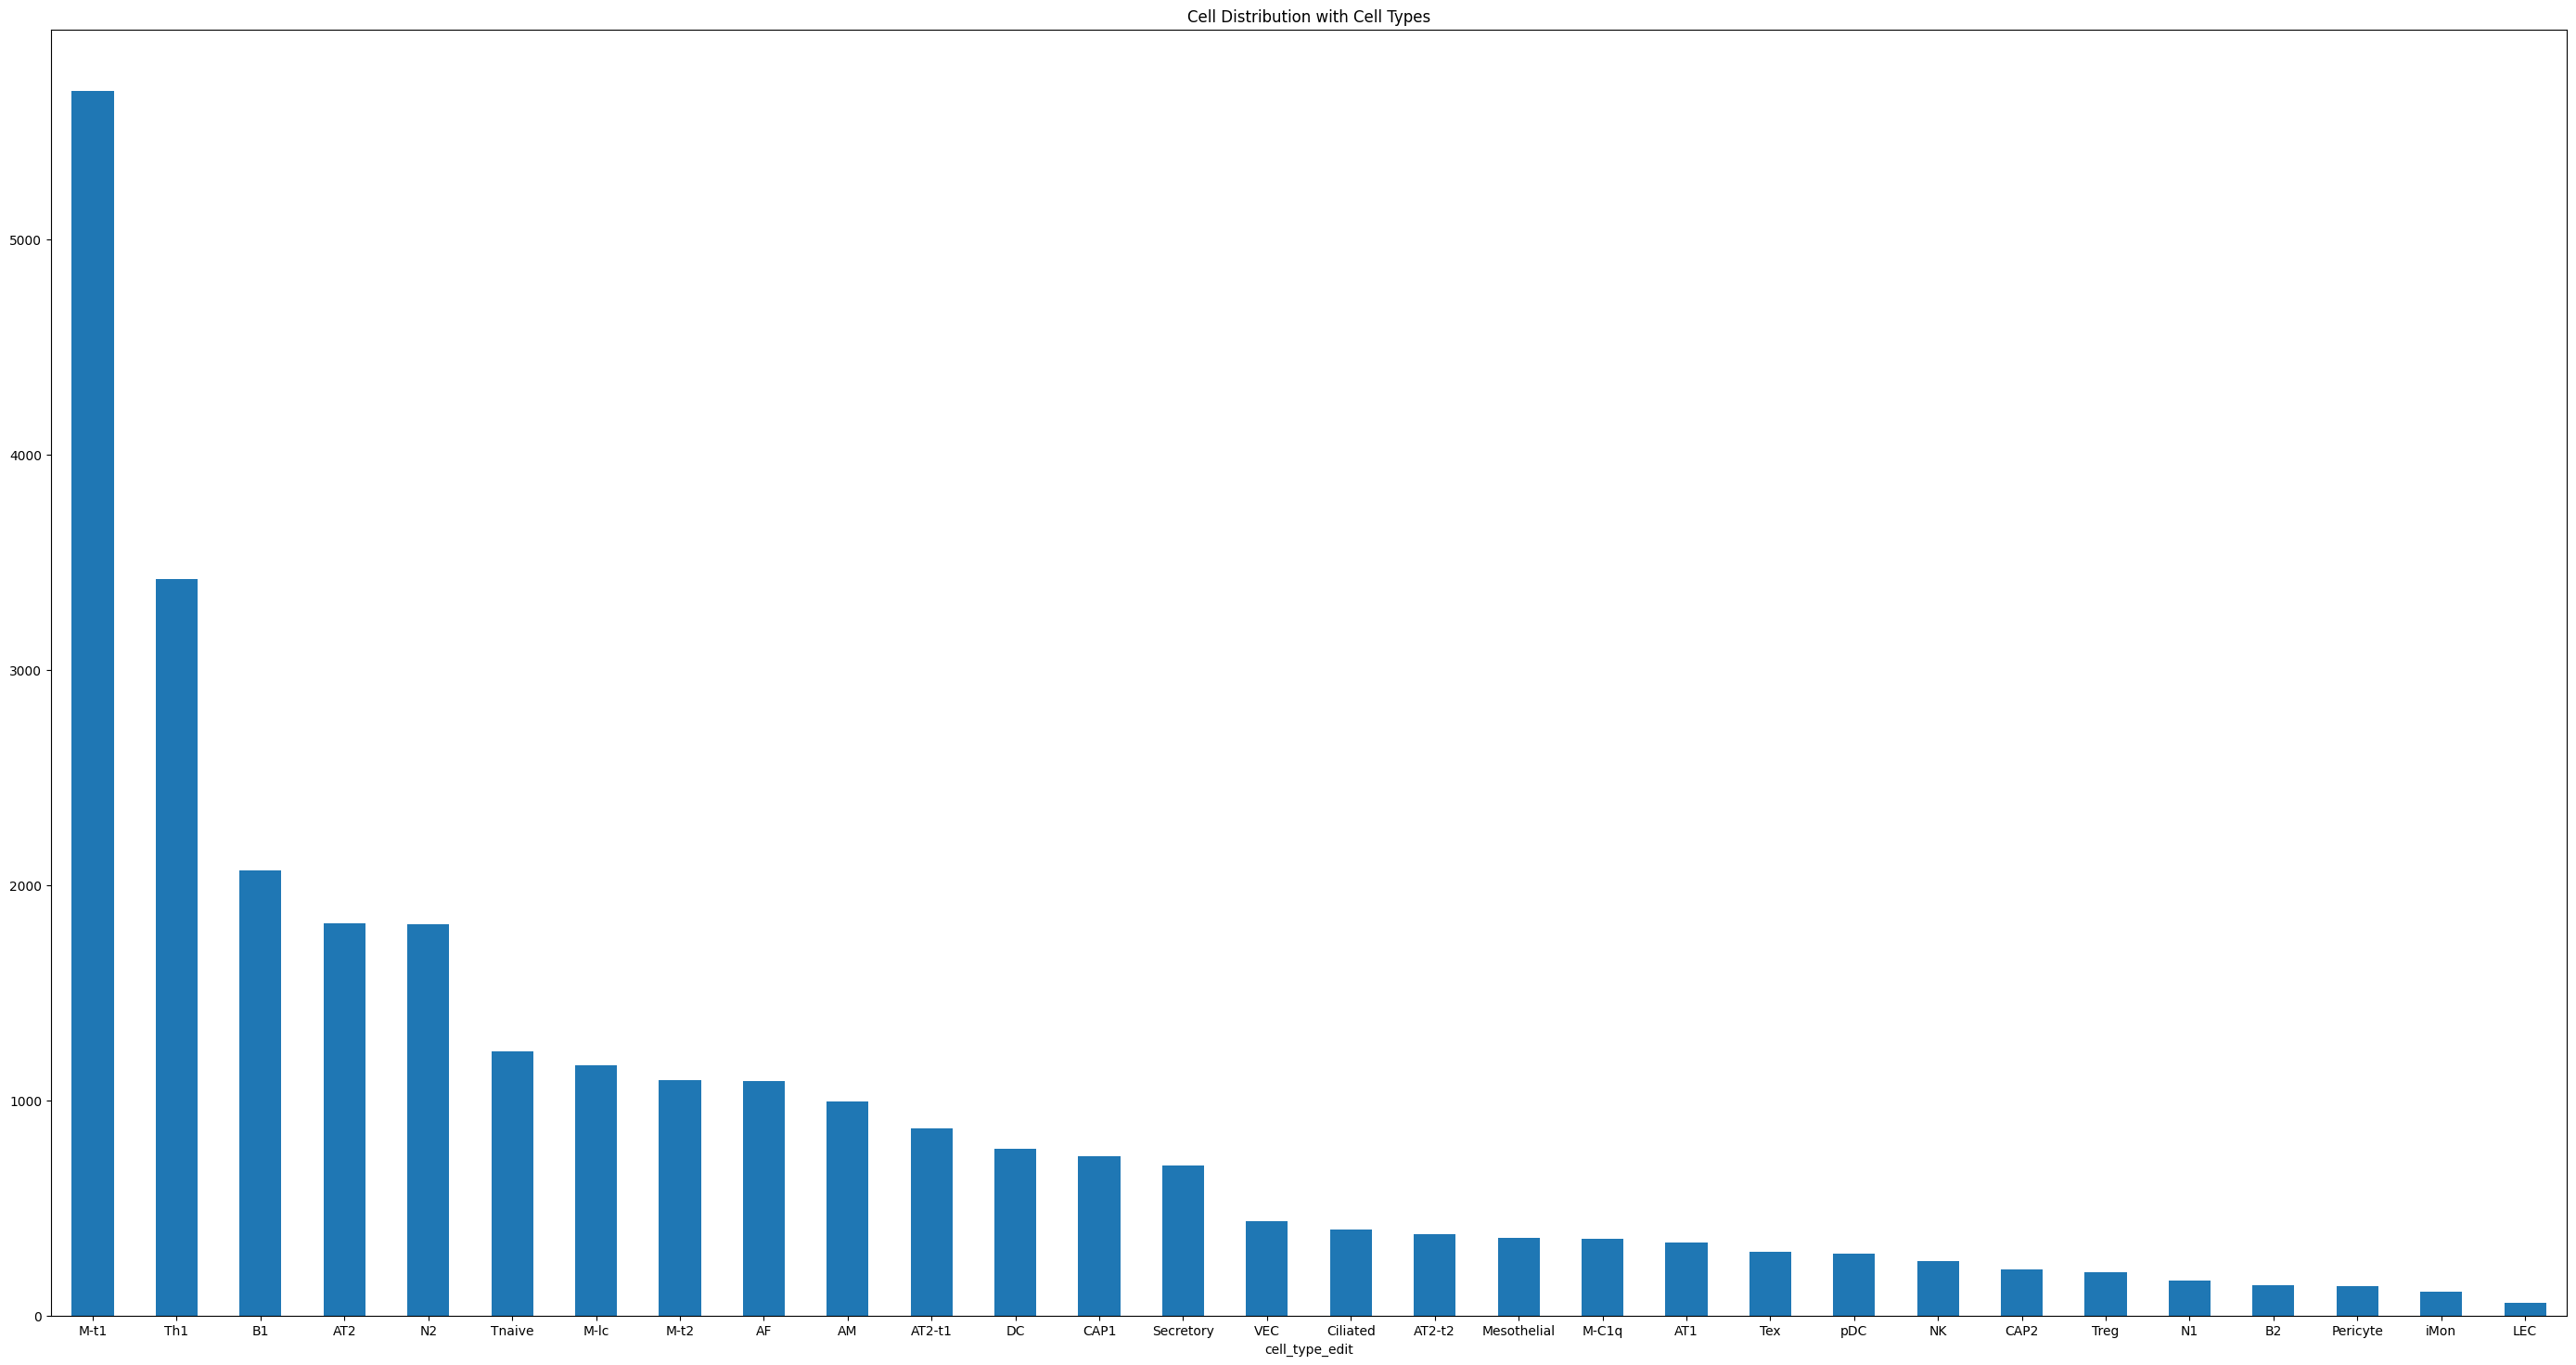

In [22]:
# cell distribution with cell types
y = adata.obs['cell_type_edit']
plt.figure(figsize=(35, 18))
plt.title('Cell Distribution with Cell Types')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

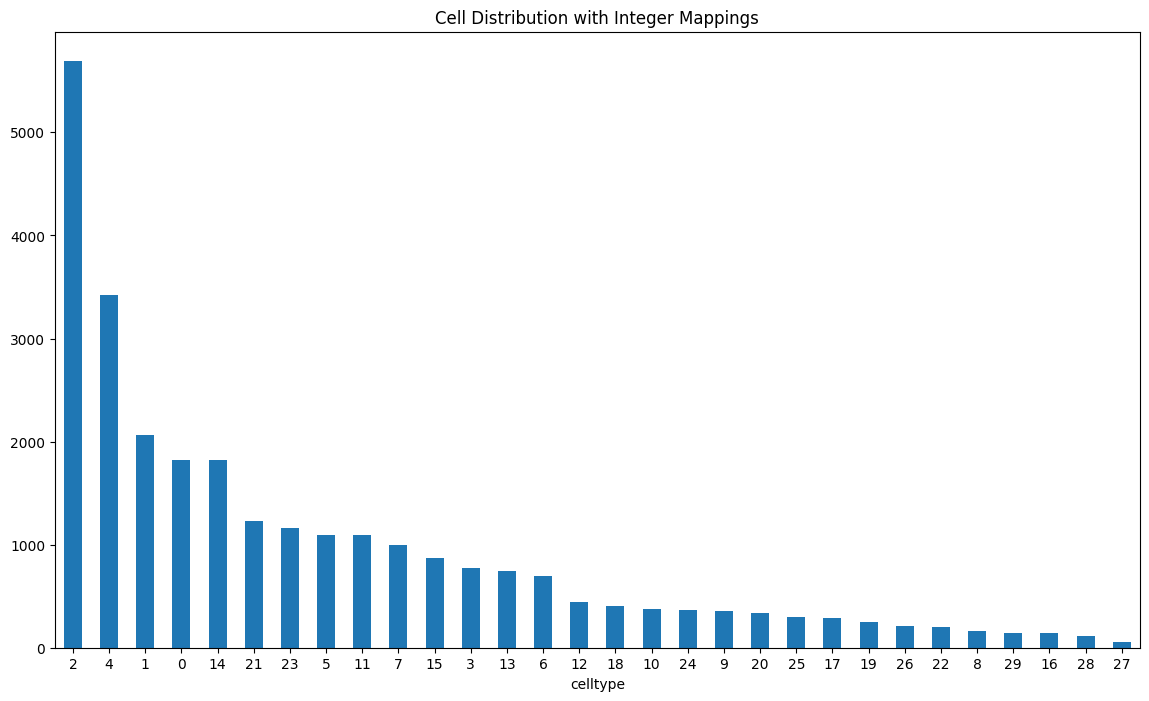

In [23]:
# cell distribution with int mappings
y = adata.obs['celltype']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Integer Mappings')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

In [24]:
# trying to confirm that adata.X indices correspond to adata.obs indices
# the idea is that the gene expression levels should correlate to the total counts of each cell
# not accurate with adata.X because those sums have been log transformed

row_sums_X = np.array(adata.layers["counts"].sum(axis=1)).flatten() # adata.layers["counts"] should be the raw counts matrix (maybe check granulomas_final_raw.h5ad's adata.X for equality)

obs_sums = adata.obs["total_counts"].values

corr = np.corrcoef(row_sums_X, obs_sums)[0,1]
print("Correlation:", corr)

Correlation: 0.9996135210465931


In [ ]:
fourth_dict = {
    'Blood vessels': ['CAP1','CAP2','VEC','AEC'],
    'Lymphatic EC': ['LEC'],
    'Airway epithelium': ['Ciliated','Secretory'],
    'Alveolar epithelium': ['AT1','AT2','AT2-t1','AT2-t2'],
    'Fibroblast': ['AF','Pericyte'],
    'Smooth muscle': ['SMC'],
    'Mesothelial': ['Mesothelial'],
    'B lineage': ['B1','B2'],
    'T lineage': ['Th1','Tnaive','Treg','Tex'],
    'NK': ['NK'],
    'Macrophage': ['AM','M-t1','M-t2','M-C1q','M-lc'],        
    'mononuclear': ['iMon','DC','pDC'],
    'Neutrophil': ['N1','N2']
}

group_lookup = {}
for broad_cat, fine_types in fourth_dict.items():
    for ft in fine_types:
        group_lookup[ft] = broad_cat

In [ ]:
group_lookup

In [ ]:
adata.obs["fourth_annotation"] = adata.obs['cell_type_edit'].map(group_lookup)

In [ ]:
adata.obs["fourth_annotation"]

In [ ]:
print("Broad celltype value counts:")
print(adata.obs["fourth_annotation"].value_counts())
print(adata.obs["fourth_annotation"].unique())

In [ ]:
fourth_level = adata.obs["fourth_annotation"].unique()
cell_type_subsets = {}

for cell_group in fourth_level:
    
    adata_sub = adata[adata.obs["fourth_annotation"] == cell_group].copy()
    cell_type_subsets[cell_group] = adata_sub
    
    print(f"\nCreated subset for broad cell type '{cell_group}' "f"with {adata_sub.n_obs} cells.")

In [ ]:
adata_alveolar_epithelium = cell_type_subsets['Alveolar epithelium']
adata_b_lineage = cell_type_subsets['B lineage']
adata_macrophage = cell_type_subsets['Macrophage']
adata_mononuclear = cell_type_subsets['mononuclear']
adata_t_lineage = cell_type_subsets['T lineage']
adata_airway_epithelium = cell_type_subsets['Airway epithelium']
adata_neutrophil = cell_type_subsets['Neutrophil']
adata_fibroblast = cell_type_subsets['Fibroblast']
adata_blood_vessels = cell_type_subsets['Blood vessels']
adata_nk = cell_type_subsets['NK']
adata_mesothelial = cell_type_subsets['Mesothelial']
adata_lymphatic_ec = cell_type_subsets['Lymphatic EC']

In [ ]:
adata_alveolar_epithelium.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_alveolar_epithelium.h5ad") 
adata_b_lineage.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_b_lineage.h5ad")
adata_macrophage.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_macrophage.h5ad")
adata_mononuclear.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_mononuclear.h5ad")
adata_t_lineage.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_t_lineage.h5ad")
adata_airway_epithelium.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_airway_epithelium.h5ad")
adata_neutrophil.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_neutrophil.h5ad")
adata_fibroblast.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_fibroblast.h5ad")
adata_blood_vessels.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_blood_vessels.h5ad")
adata_nk.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_nk.h5ad")
adata_mesothelial.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_mesothelial.h5ad")
adata_lymphatic_ec.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_lymphatic_ec.h5ad")

In [25]:
# highly variable genes

adata_hvg = adata[:, adata.var['highly_variable'] ].copy()
print("# highly variable genes:", adata.var['highly_variable'].sum())
print("shape:", adata_hvg.shape)

# highly variable genes: 3475
shape: (27603, 3475)


In [26]:
adata_hvg

AnnData object with n_obs × n_vars = 27603 × 3475
    obs: 'scDblFinder_score', 'scDblFinder_class', 'doublet', 'n_genes_by_counts', 'total_counts', 'type', 'sample', 'batch_type', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'size_factors', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.4', 'leiden_1.7', 'leiden_2.0', 'leiden_2.5', 'leiden_3.0', 'leiden_3.5', 'leiden_4.0', 'leiden_4.5', 'hclust', 'kmeans', 'my_clust_1', 'immune', 'mesothelial', 'stromal', 'endothelial', 'epithelial', 'muscle', 'Immune', 'Myeloid', 'Lymphoid', 'Mesenchyme', 'Mesothelial', 'Stromal', 'SMC', 'Endothelial', 'Blood vessels', 'LEC', 'Epithelial', 'Ciliated', 'Secretory', 'cell_type_edit', 'cellt

In [ ]:
# scGNN imputed matrix
scGNN_matrix = sc.read_csv("../Data/granuloma_recon.csv")

In [ ]:
scGNN_matrix

In [ ]:
scGNN_matrix.obs["celltype"] = adata.obs["celltype"]

In [ ]:
scGNN_matrix.obs["celltype"]

In [ ]:
# not accurate because scGNN_matrix.X has transformed the sums in some way

row_sums_X = np.array(scGNN_matrix.X.sum(axis=1)).flatten()

obs_sums = adata.obs["total_counts"].values

corr = np.corrcoef(row_sums_X, obs_sums)[0,1]
print("Correlation:", corr)

In [ ]:
scGNN_matrix.write("../Data/scGNN_matrix.h5ad") 

In [ ]:
scGNN_embedding = sc.read_csv("../Data/granuloma_embedding.csv")

In [ ]:
scGNN_embedding

In [ ]:
scGNN_embedding.obs

In [ ]:
scGNN_embedding.var

In [56]:
X = adata.X
y = adata.obs['celltype'].values

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state=52, stratify=y)
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size = 0.5, random_state=70, stratify=test_labels)
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)  

train_features = np.array(train_features)
test_features = np.array(test_features)
val_features = np.array(val_features)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)
weights = np.array(weights)                  
       
print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)
print('Weights shape:', weights.shape)

np.save('../Arrays/train_features.npy', train_features)
np.save('../Arrays/test_features.npy', test_features)
np.save('../Arrays/val_features.npy', val_features)
np.save('../Arrays/train_labels.npy', train_labels)
np.save('../Arrays/test_labels.npy', test_labels)
np.save('../Arrays/val_labels.npy', val_labels)
np.save('../Arrays/weights.npy', weights)

Training features shape: (22082, 23693)
Validation features shape: (2761, 23693)
Test features shape: (2760, 23693)
Training labels shape: (22082,)
Validation labels shape: (2761,)
Test labels shape: (2760,)
Weights shape: (30,)


In [57]:
# 5 GB
adata_hvg.write("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_hvg.h5ad")

In [62]:
adata = sc.read_h5ad("C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_subset.h5ad")

In [63]:
adata

AnnData object with n_obs × n_vars = 22082 × 23693
    obs: 'scDblFinder_score', 'scDblFinder_class', 'doublet', 'n_genes_by_counts', 'total_counts', 'type', 'sample', 'batch_type', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'size_factors', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.4', 'leiden_1.7', 'leiden_2.0', 'leiden_2.5', 'leiden_3.0', 'leiden_3.5', 'leiden_4.0', 'leiden_4.5', 'hclust', 'kmeans', 'my_clust_1', 'immune', 'mesothelial', 'stromal', 'endothelial', 'epithelial', 'muscle', 'Immune', 'Myeloid', 'Lymphoid', 'Mesenchyme', 'Mesothelial', 'Stromal', 'SMC', 'Endothelial', 'Blood vessels', 'LEC', 'Epithelial', 'Ciliated', 'Secretory', 'cell_type_edit', 'cell

In [64]:
adata_hvg = adata[:, adata.var['highly_variable'] ].copy()

In [65]:
adata_hvg

AnnData object with n_obs × n_vars = 22082 × 3475
    obs: 'scDblFinder_score', 'scDblFinder_class', 'doublet', 'n_genes_by_counts', 'total_counts', 'type', 'sample', 'batch_type', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'size_factors', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.4', 'leiden_1.7', 'leiden_2.0', 'leiden_2.5', 'leiden_3.0', 'leiden_3.5', 'leiden_4.0', 'leiden_4.5', 'hclust', 'kmeans', 'my_clust_1', 'immune', 'mesothelial', 'stromal', 'endothelial', 'epithelial', 'muscle', 'Immune', 'Myeloid', 'Lymphoid', 'Mesenchyme', 'Mesothelial', 'Stromal', 'SMC', 'Endothelial', 'Blood vessels', 'LEC', 'Epithelial', 'Ciliated', 'Secretory', 'cell_type_edit', 'cellt

In [67]:
X = adata_hvg.X
y = adata_hvg.obs['celltype'].values

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state=711, stratify=y)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size = 0.125, random_state=136, stratify=train_labels)
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)  

train_features = np.array(train_features)
test_features = np.array(test_features)
val_features = np.array(val_features)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)
weights = np.array(weights)                  
       
print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)
print('Weights shape:', weights.shape)

np.save('../Arrays/train_features_hvg_subset.npy', train_features)
np.save('../Arrays/test_features_hvg_subset.npy', test_features)
np.save('../Arrays/val_features_hvg_subset.npy', val_features)
np.save('../Arrays/train_labels_hvg_subset.npy', train_labels)
np.save('../Arrays/test_labels_hvg_subset.npy', test_labels)
np.save('../Arrays/val_labels_hvg_subset.npy', val_labels)
np.save('../Arrays/weights_hvg_subset.npy', weights)

Training features shape: (15456, 3475)
Validation features shape: (2209, 3475)
Test features shape: (4417, 3475)
Training labels shape: (15456,)
Validation labels shape: (2209,)
Test labels shape: (4417,)
Weights shape: (30,)
